In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import wandb
from tqdm import tqdm

In [11]:
runs = {
    'cs294-190-hw1/hw1/kap4ytaf':500,
    'cs294-190-hw1/hw1/az93cnr1':100,
    'cs294-190-hw1/hw1/egrhegxj':25,
    'cs294-190-hw1/hw1/vjqagow1':10,
    'cs294-190-hw1/hw1/rhq1iysc':3}

agent1 = {k:np.array([]) for k in [500, 100, 25, 10, 3]}
agent2 = {k:np.array([]) for k in [500, 100, 25, 10, 3]}
draws = {k:np.array([]) for k in [500, 100, 25, 10, 3]}

for mode in ['', '-r']:
    for run in tqdm(runs):
        for it in tqdm(range(1, 11)):
            path = 'LeNetLeNet_{}.pth.tar'.format(it)
            script = ['python', 'main.py', '-n', '100', '-p', path, '-a', 'lenet', '-m', run]
            api = wandb.Api()
            r = api.run(run)
            r.file(path).download(replace=True)
            if mode == '-r':
                script.append(mode)
            s=subprocess.check_output(script)
            a1, a2, dr = [x for x in s.decode('utf-8').split(' ')[-1].split('\n') if x]
            agent1[runs[run]] = np.append(agent1[runs[run]], a1)
            agent2[runs[run]] = np.append(agent2[runs[run]], a2)
            draws[runs[run]] = np.append(draws[runs[run]], dr)



100%|██████████| 5/5 [22:21<00:00, 268.21s/it]


# Alpha-Zero Analysis

## Against MinMax

In [22]:
import pickle as pkl
with open('a1-v2.pkl', 'rb') as f:
    agent1 = pkl.load(f)
with open('a2-v2.pkl', 'rb') as f:
    agent2 = pkl.load(f)
with open('dr-v2.pkl', 'rb') as f:
    draws = pkl.load(f)

In [34]:
len([int(x) for x in a2[:11]])

11

In [44]:
np.arange(1,11) + np.arange(15, 16)

array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

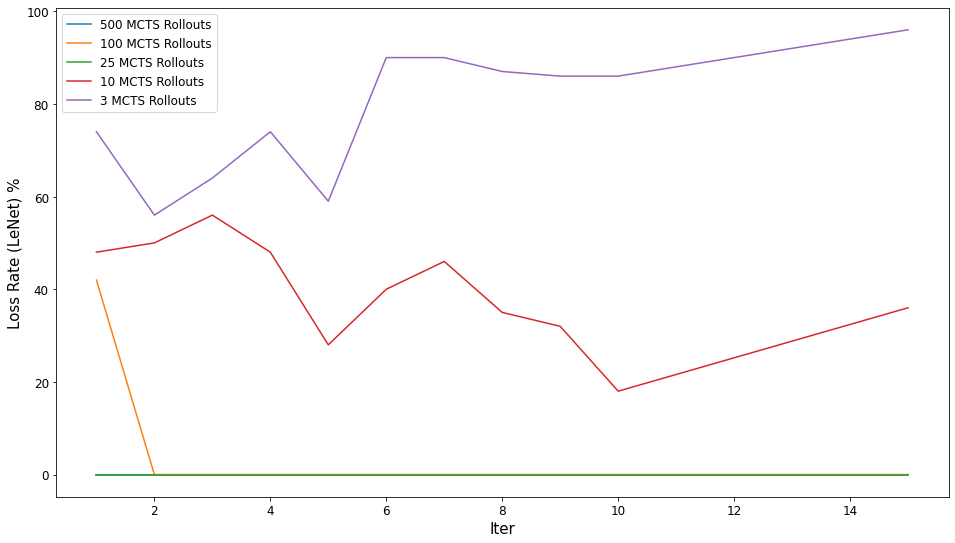

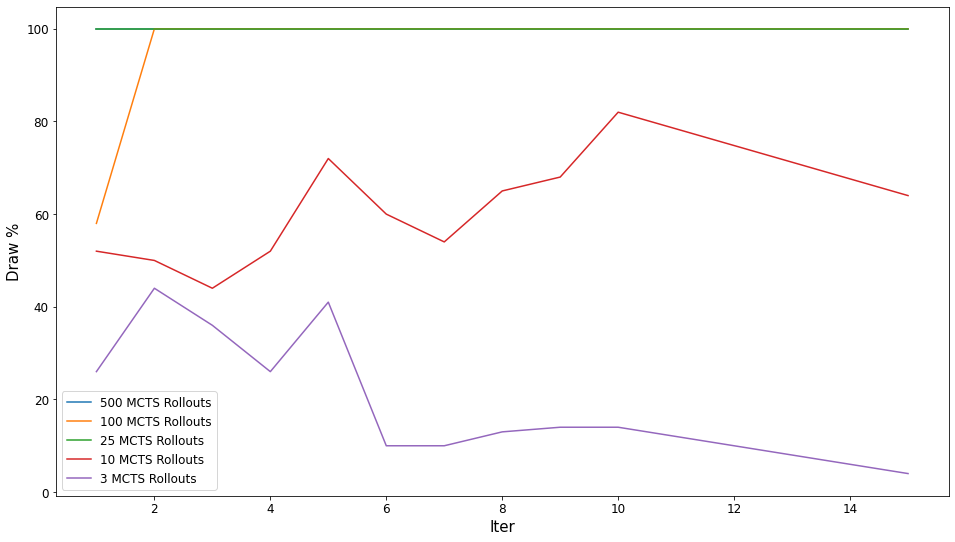

In [59]:
plt.figure(figsize=(16,9))
for hyp in agent1:
    a1 = agent1[hyp]
    a2 = agent2[hyp]
    dr = draws[hyp]
    plt.plot([x for x in np.arange(1,11)] + [15], [int(x) for x in a2[:11]], label='{} MCTS Rollouts'.format(hyp))
    plt.legend(fontsize='large')
    plt.xlabel('Iter', size=15)
    plt.ylabel('Loss Rate (LeNet) %', size=15)
    plt.xticks(fontsize=12), plt.yticks(fontsize=12)
    plt.savefig('exp1b.png')
plt.show()

plt.figure(figsize=(16,9))
for hyp in agent1:
    a1 = agent1[hyp]
    a2 = agent2[hyp]
    dr = draws[hyp]

    plt.plot([x for x in np.arange(1,11)] + [15], [int(x) for x in dr[:11]], label='{} MCTS Rollouts'.format(hyp))
    plt.legend(fontsize='large')
    plt.xlabel('Iter', size=15)
    plt.ylabel('Draw %', size=15)
    plt.xticks(fontsize=12), plt.yticks(fontsize=12)
    plt.savefig('exp1c.png')

plt.show()

## Against Random

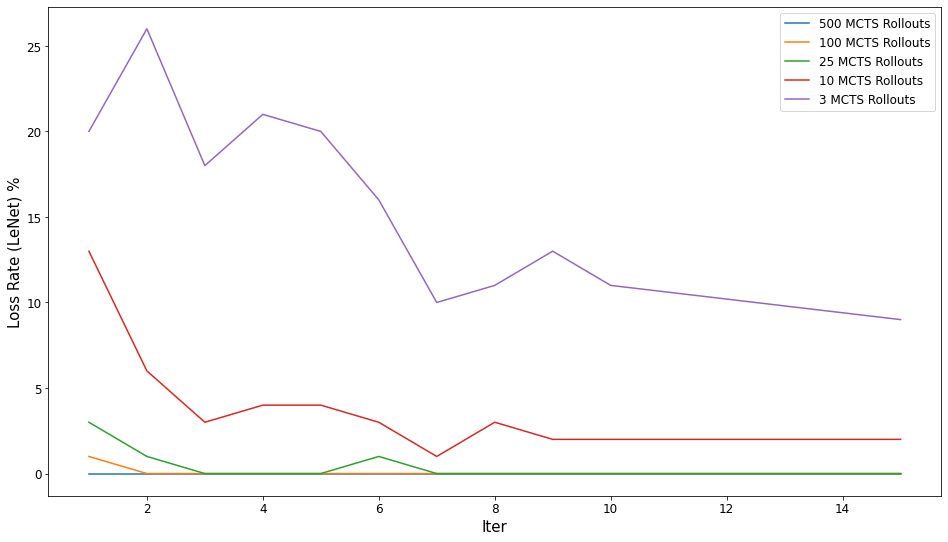

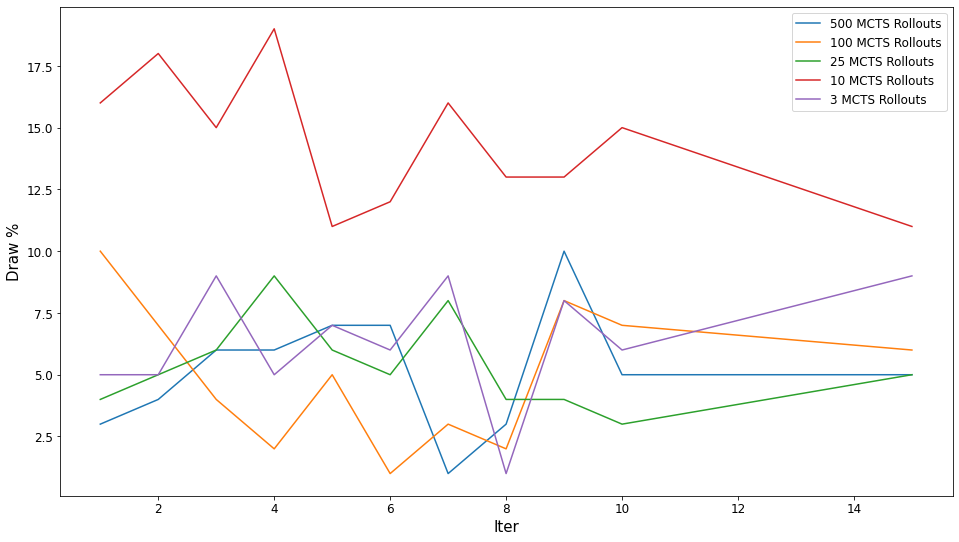

In [60]:
plt.figure(figsize=(16,9))
for hyp in agent1:
    a1 = agent1[hyp]
    a2 = agent2[hyp]
    dr = draws[hyp]
    plt.plot([x for x in np.arange(1,11)] + [15], [int(x) for x in a2[11:]], label='{} MCTS Rollouts'.format(hyp))
    plt.legend(fontsize='large')
    plt.xlabel('Iter', size=15)
    plt.ylabel('Loss Rate (LeNet) %', size=15)
    plt.xticks(fontsize=12), plt.yticks(fontsize=12)
    plt.savefig('exp2b.png')
plt.show()

plt.figure(figsize=(16,9))
for hyp in agent1:
    a1 = agent1[hyp]
    a2 = agent2[hyp]
    dr = draws[hyp]

    plt.plot([x for x in np.arange(1,11)] + [15], [int(x) for x in dr[11:]], label='{} MCTS Rollouts'.format(hyp))
    plt.legend(fontsize='large')
    plt.xlabel('Iter', size=15)
    plt.ylabel('Draw %', size=15)
    plt.xticks(fontsize=12), plt.yticks(fontsize=12)
    plt.savefig('exp2c.png')

plt.show()

##